# Outlier Detection with the 3-sigma Rule {.unnumbered}

## Python implementation

In this application we study how to detect outliers from a time-series (i.e. a one-dimensional signal), using the 3-sigma rule.

The 3-sigma rule is simple:

> Any value which is more than $3 \sigma$ away from the mean value is an outlier.


First, we need to import some libraries in Python

In [72]:
import numpy as numpy
import matplotlib.pyplot as plt

Suppose we have the following data series. 

In Python, with `[ ]` we create a **list** of objects. This list is then converted to a **numpy array**, which is similar to a Matlab array.

A numpy array always has the attribute `shape` which indicates the shape of the data, e.g. the dimensions and length along each dimension.

In [73]:
data = np.array([20.1, 18.2, 19.9, 20.7, 18.9, 19.8, 214.33, 21.2, 20.5, 18.6, 22.3, 20.8, 19.7])

data.shape

(13,)

If you see the shape `(13,)` above, this means your `data` array has a single dimension of size 13, i.e. it is a **vector** with 13 elements.

Let's compute the mean and the standard deviation of the data, using the functions:
- `numpy.mean()`
- `numpy.std()`
- `numpy.var()` computes the variance (i.e. standard deviation squared)
- 
We can use the shorthand notation `np`, since we imported `numpy` as `np`.

In [74]:
mean = np.mean(data)
stddev = np.std(data)   # ToMe: check ddof
var = np.var(data)      # We don't really need it, it's just for showing

print(f"Mean = {mean}, standard deviation = {stddev}, variance = {var}")  # Use f-strings

Mean = 35.002307692307696, standard deviation = 51.77831357057719, variance = 2680.9937562130176


Now let's check which values are more than $3 \sigma$ away from the mean, by checking if $|x - \mu| > 3 \sigma$ for every value $x$.

`numpy.abs()` does the absolute value of a number or array.

The resulting `outliers` is an array of the same shape as `data`, because of broadcasting rules:
- `data` is an array
- `data - mean` is an array - a scalar, which produces an array of same size as `data`, subtracting from each element the scalar value
- `np.abs()` computes the absolute values, the shape stays the same (an array)
- `np.abs(...) > threshold` is an array compared to a scalar, which produces an array of same size, comparing each element with the scalar

In [75]:
# Set the threshold for outliers
threshold = 3 *stddev

# Detect outliers
outliers = np.abs(data - mean) > threshold

print(outliers)

[False False False False False False  True False False False False False
 False]


Finally, let's do some plotting magic, using the `matplotlib` library (imported as `plt`).

- `plt.plot()` works similar to Matlab's `plot()`, it draws a signal
- `plt.scatter()` places red circles at the locations of the outliers
- `plt.text()` places text at given locations

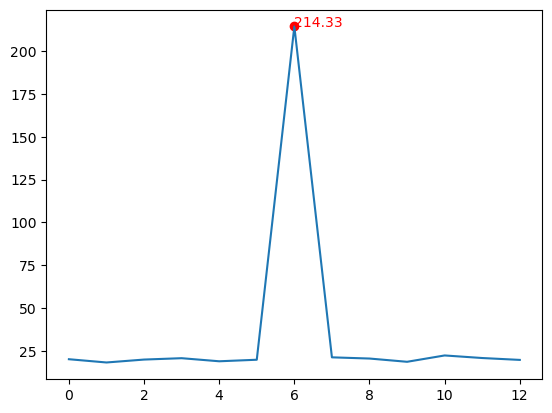

In [76]:
# Display the time series data with outliers
plt.plot(data)
plt.scatter(np.where(outliers)[0], data[outliers], color='red')

# Label the outliers
for i in range(len(data)):
    if outliers[i]:
        plt.text(i, data[i], str(data[i]), color='red')

plt.show()

## Matlab implementation

Below is the same program, written in Matlab.

```matlab
% Calculate the mean and standard deviation of the data
meanValue = mean(data);
stdDev = std(data);

% Set the threshold for outliers
threshold = 3 * stdDev;

% Detect outliers
outliers = abs(data - meanValue) > threshold;

% Display the time series data with outliers
plot(data);
hold on;

% Mark the outliers on the plot
scatter(find(outliers), data(outliers), 'ro');
hold off;

% Label the outliers
for i = 1:length(data)
    if outliers(i)
        text(i, data(i), num2str(data(i)), 'Color', 'red');
    end
end
```